

<font size=40 color=purple> Graduate Admissions Predictions</font>

## List of Features

1. Serial No.
2. GRE Score (Out of 340)
3. TOEFL Score (Out of 120)
4. University Rating (From 1 - 5)
5. SOP : Rating the Statement of Purpose (out of 5)
6. LOR : Rating the Letter of Recommendation (out of 5)
7. CGPA : Cumulative GPA in undergraduate (out of 10)
8. Research : Whether the Student has been a part of any research (1 or 0)
9. Chance of Admit : Probability that a student might get into the University (out of 1)

Source : This is a part of a guided course on Coursera. 
Data Source : kaggle website

### Importing the required libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [82]:
import numpy as np

X = [1,2,3,4]
X = np.array(X)
X = X.reshape(-1,1)

print(X.shape)

(4, 1)


In [2]:
# The code was removed by Watson Studio for sharing.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#since we already have a serial number column, we can drop the serial number column
admission_df.drop(columns=['Serial No.'], inplace=True)
admission_df.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


### Performing Data Analysis

In [4]:
#are there any null values?
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
#great! so there is no null cells for me to fill. Next we shall take a look at the information of the dataframe
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [6]:
#getting a statistical summary of the entire dataframe 
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
#groubing by University Ranking
adm_df = admission_df.groupby('University Rating').mean()
adm_df

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


### Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6cd0834208>,
      dtype=object)

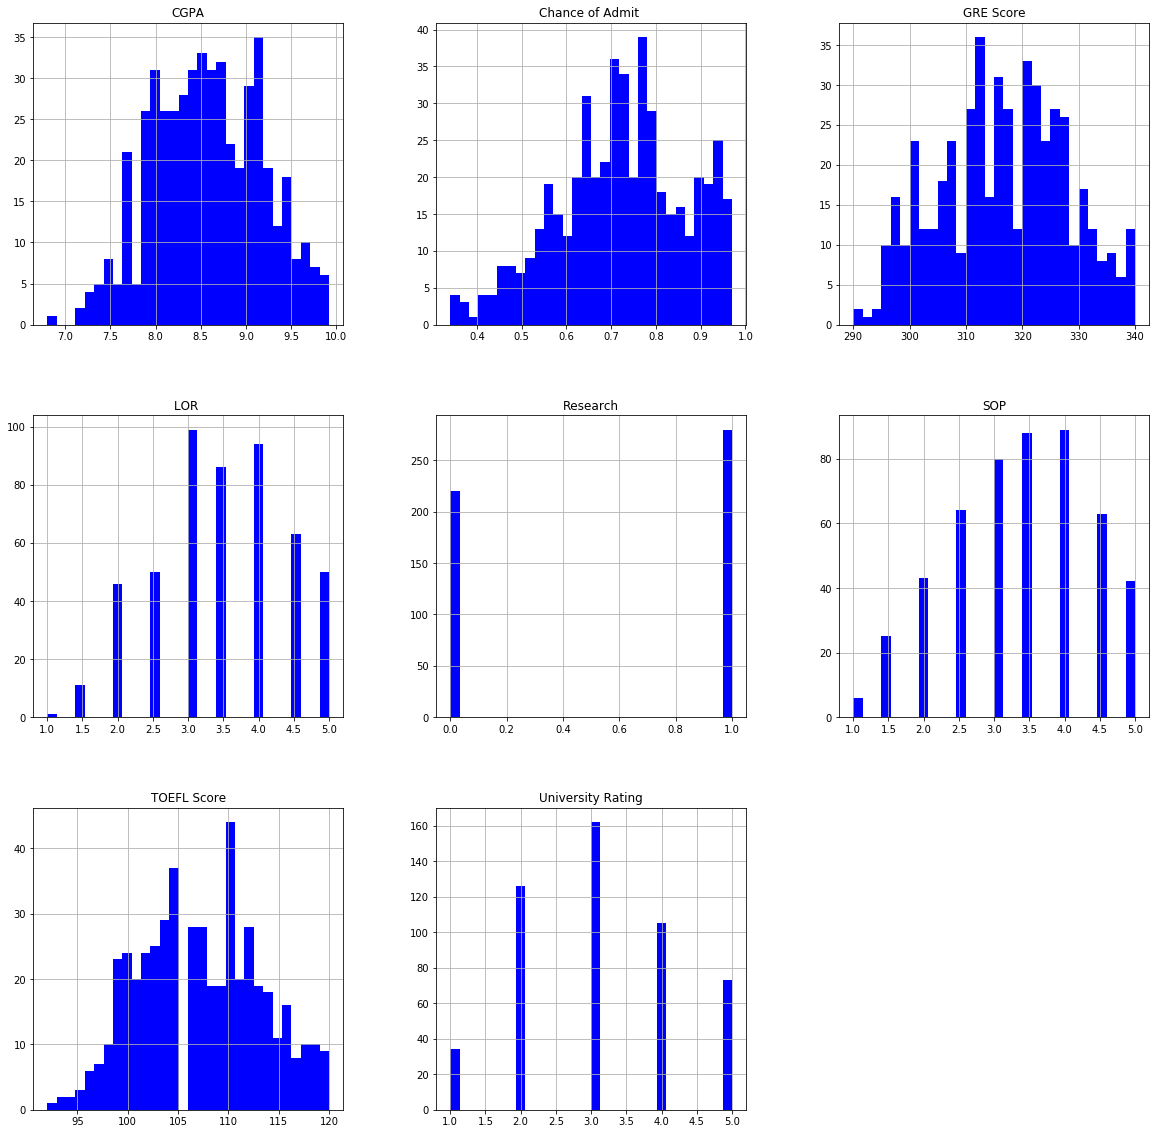

In [8]:
admission_df.hist(bins=30, figsize=(20,20),color='b')

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


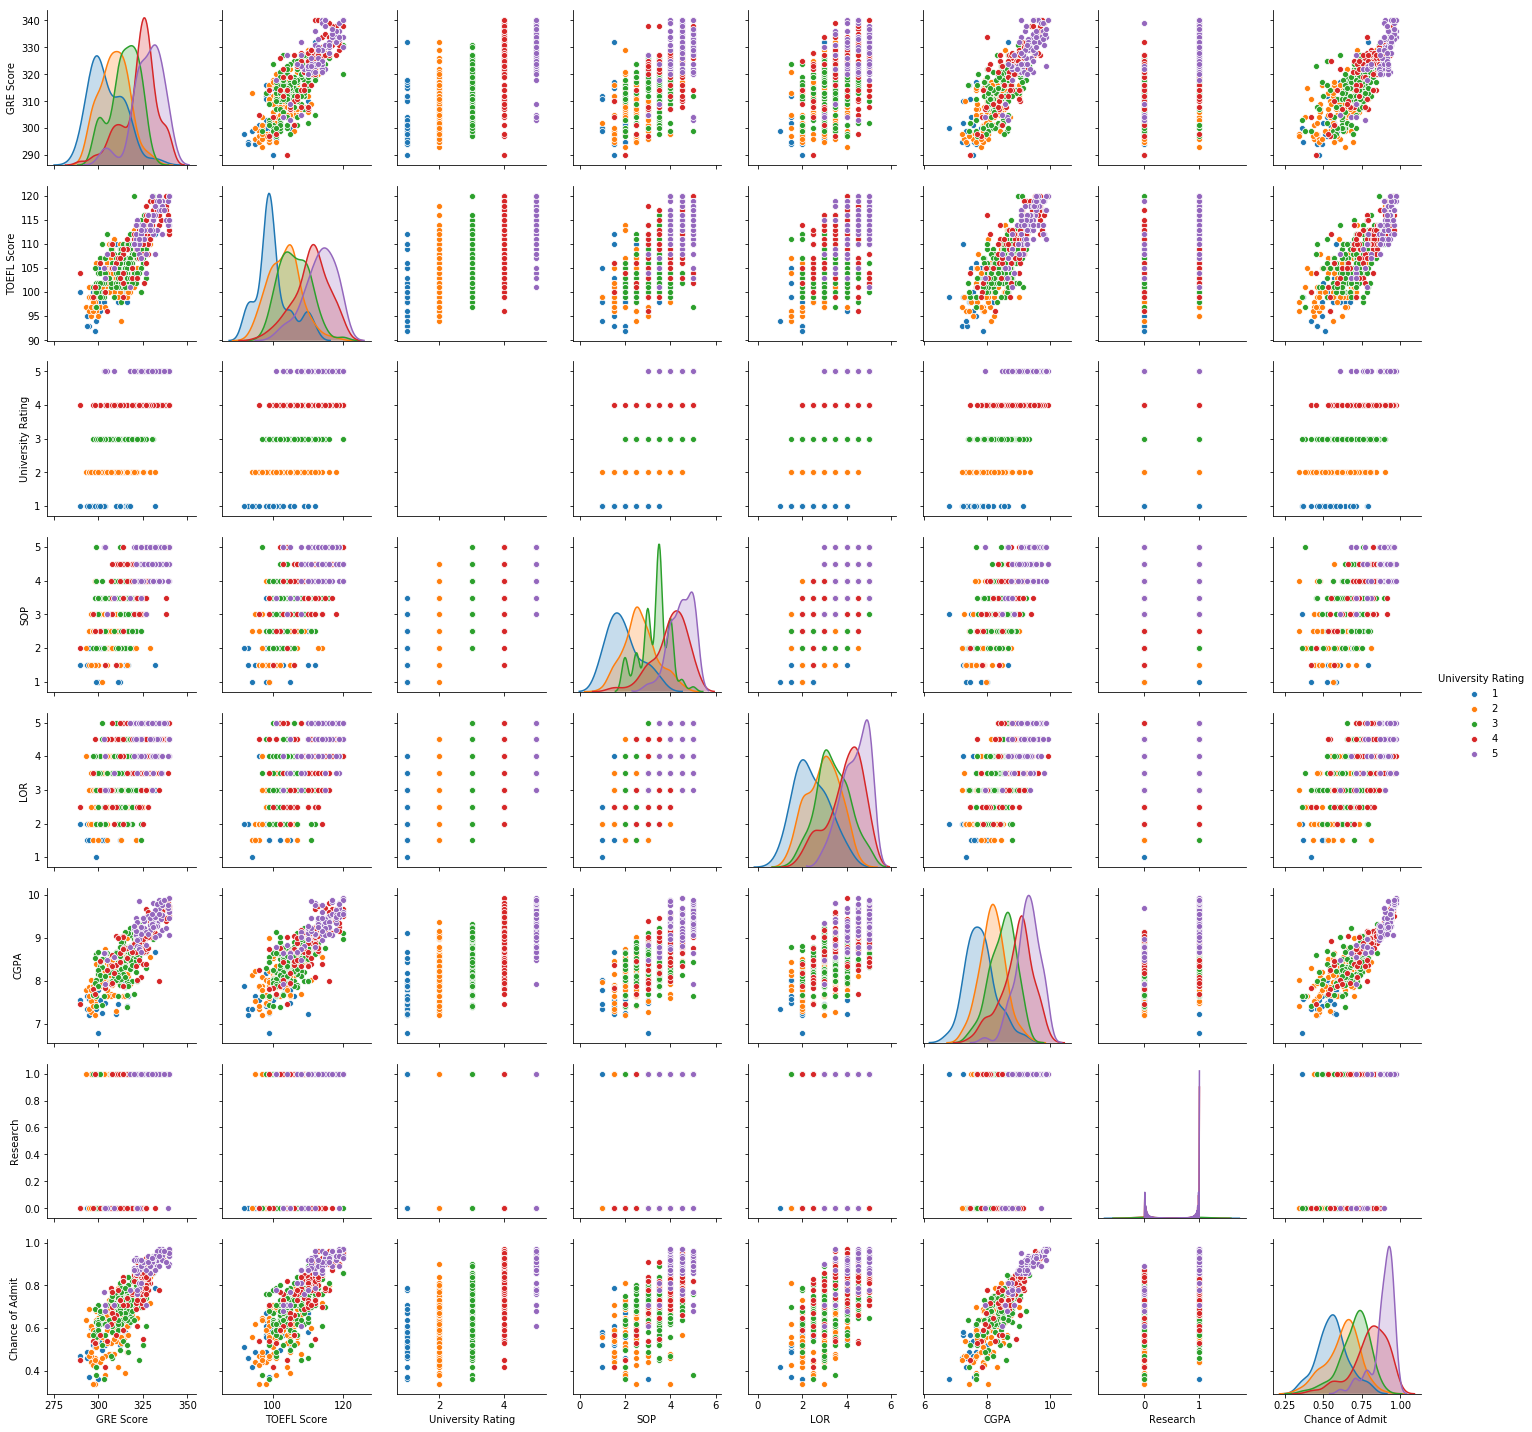

In [9]:
#now we shall use pairplots. This will allow us to visualize the distribution of single variables and relationships between 2 variables
sns.pairplot(admission_df, hue = 'University Rating')

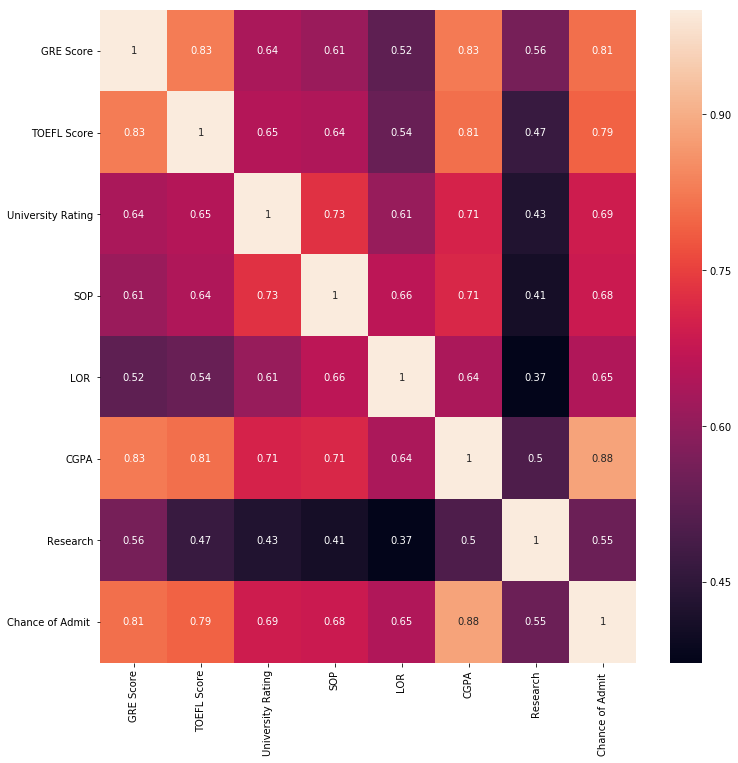

In [10]:
#to get a better idea we shall now build a correlation matrix.
corr_matrix = admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Training and testing dataset

In [11]:
X = admission_df.drop(columns=['Chance of Admit '])
y = admission_df['Chance of Admit ']
X.shape, y.shape

((500, 7), (500,))

In [12]:
#now converting the data to array
X = np.array(X)
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(500, 1)

In [40]:
# we don't want the model to be biased so we will scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y)

In [78]:
#now splitting our data into training and testing 
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.15)

### Training and Evaluating a Linear Regression Model

In [68]:
#Using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
LR_model = LinearRegression()
LR_model.fit(X_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
LinReg_acc = LR_model.score(X_te, y_te)
LinReg_acc

0.8307015171604862

## Training and Evaluating An Artificial Neural Network

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
ANN_model = keras.Sequential() #adding neurons sequentially
ANN_model.add(Dense(50, input_dim=7)) #adding fully connected layer of 50 neurons with 7 features(from our dataset)
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5)) #drop 50% of the neurons and connected weights to avoid overfitting

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss='mse',optimizer='adam')
ANN_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_______________________________________

In [19]:
ANN_model.compile(optimizer='Adam',loss='mean_squared_error')

In [20]:
epoch_hist = ANN_model.fit(X_tr, y_tr, epochs=100, batch_size=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
425/425 [==============================] - 32s 74ms/sample - loss: 0.6054
Epoch 2/100
425/425 [==============================] - 33s 78ms/sample - loss: 0.3533
Epoch 3/100
425/425 [==============================] - 32s 76ms/sample - loss: 0.2701
Epoch 4/100
425/425 [==============================] - 32s 75ms/sample - loss: 0.2888
Epoch 5/100
425/425 [==============================] - 32s 76ms/sample - loss: 0.2613
Epoch 6/100
425/425 [==============================] - 33s 77ms/sample - loss: 0.2442
Epoch 7/100
425/425 [==============================] - 32s 75ms/sample - loss: 0.2374
Epoch 8/100
425/425 [==============================] - 30s 70ms/sample - loss: 0.2520
Epoch 9/100
425/425 [==============================] - 32s 75ms/sample - loss: 0.2488
Epoch 10/100
425/425 [==============================] - 32s 75ms/sample - loss: 0.2261
Epoch 11/100
425/425 [==============================] - 32s 74ms/sample - loss: 0.2200
Epoc

In [21]:
result = ANN_model.evaluate(X_te, y_te) #this evaluates the loss at the end of the evaluation
ANN_acc = 1 - result
ANN_acc

75/75 [==============================] - 2s 23ms/sample - loss: 0.2102


0.7898086853822073

In [22]:
epoch_hist.history.keys()

dict_keys(['loss'])

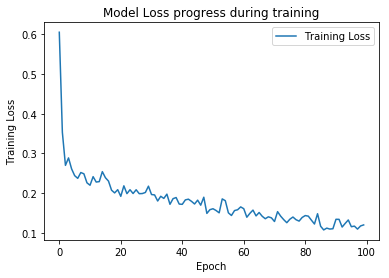

In [23]:
plt.plot(epoch_hist.history['loss'])
plt.title('Model Loss progress during training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

### Training and Evaluating Decision Tree and Random Forest Model

In [24]:
from sklearn.tree import DecisionTreeRegressor
DecTree_model = DecisionTreeRegressor()
DecTree_model.fit(X_tr, y_tr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [25]:
DecTree_acc = DecTree_model.score(X_te, y_te)
DecTree_acc

0.5683323494095687

In [26]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth=9)
RandomForest_model.fit(X_tr, y_tr)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
RandomForest_acc= RandomForest_model.score(X_te, y_te)
RandomForest_acc

0.805251684534995

## Assessing Model Performance

Error = y(predicted)-y(actual)


In [28]:
#Mean absolute error (mae) is np.mean(sum(abs(yhat-y)))
#MAE to be ->0 (for model to be perfect)

In [29]:
#Mean squared error (mse) is np.mean(sum((yhat - y)**2))
#Kind of an estimate of the data outliers (the outliers would be heavily penalised)
#Error increases in a quadratic way
#MAE ->0 

In [30]:
#Root mean squared error (rmse) is sqroot(mse)
#Units in the same unit as the unit of the output
#gives an estimate of how large the residuals are being despersed


In [31]:
#regression metrics (r^2) or coefficient of determination represents the proportion of variance of the dependent variable that has been explained by the independent variables
#R^2 = 1- ((sum((y-yhat)**2))/(sum((y- mean(y))**2)))
#r^2 = 0.8 would mean that 80% of the increase in the dependent variable is due to the independent variable.
#R^2 -> 1.0 is great


In [32]:
#Adjusted R^2
#R^2 increases by adding ind. variables which are not of great significance but improve the model and are highly misleading
#if we add anothr independent variable which does not improve the model or add any useful content then 
# the adjusted model will penalise it. 
#Takes into account the number of predictors and will reduce if useless features are added to the model
#adj_r2 = 1- [(1-R^2)(n-1)/(n-k-1)] where n is # of samples and K is # of independent variables

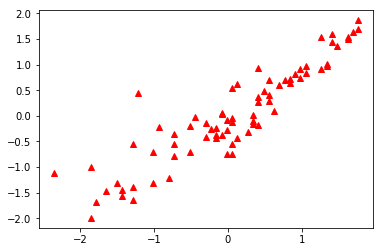

In [47]:
#Applying all these KPI to linear regression
yhat = LR_model.predict(X_te)
plt.plot(y_te, yhat, '^',color='r')

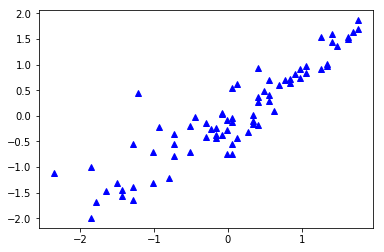

In [50]:
#Apply inverse transform to reverse it to original units so that we get a better idea of the distribution
yhat_org = y_scaler.inverse_transform(yhat)
y_te_org = y_scaler.inverse_transform(y_te)
plt.plot(y_te_org,yhat_org,'^',color='b')

In [56]:
k = X_te.shape[1]
n = len(X_te)
n,k

(75, 7)

In [60]:
#now applying all the KPIs
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
MAE = mean_absolute_error(y_te_org, yhat_org)
MSE = mean_squared_error(y_te_org, yhat_org)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_te_org, yhat_org)
adj_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))
print("MAE:{} \nMSE:{} \nRMSE:{} \nr2:{} \nadj_r2:{}".format(MAE,MSE,RMSE,r2,adj_r2))

MAE:0.2965899018085552 
MSE:0.16778163834361481 
RMSE:0.40961157008025884 
r2:0.8307015171604863 
adj_r2:0.8130136159682984
